In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data analytics intern/quotes_scraped.csv')


<ipython-input-4-853c45c20dc0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')


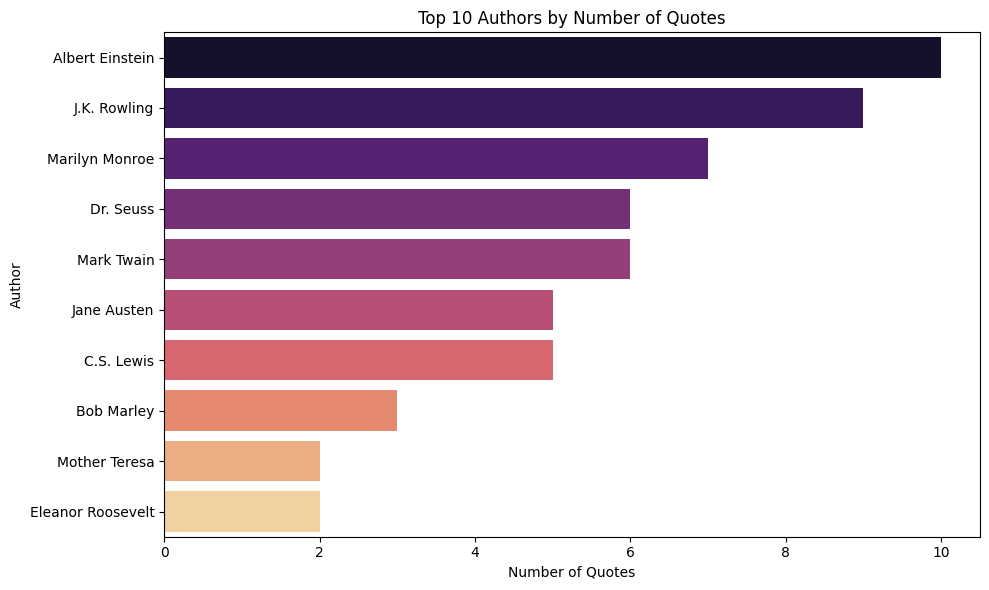

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 10 authors
top_authors = df['Author'].value_counts().head(10)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')
plt.title('Top 10 Authors by Number of Quotes')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


<ipython-input-5-869d672e38b6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tags), palette='viridis')


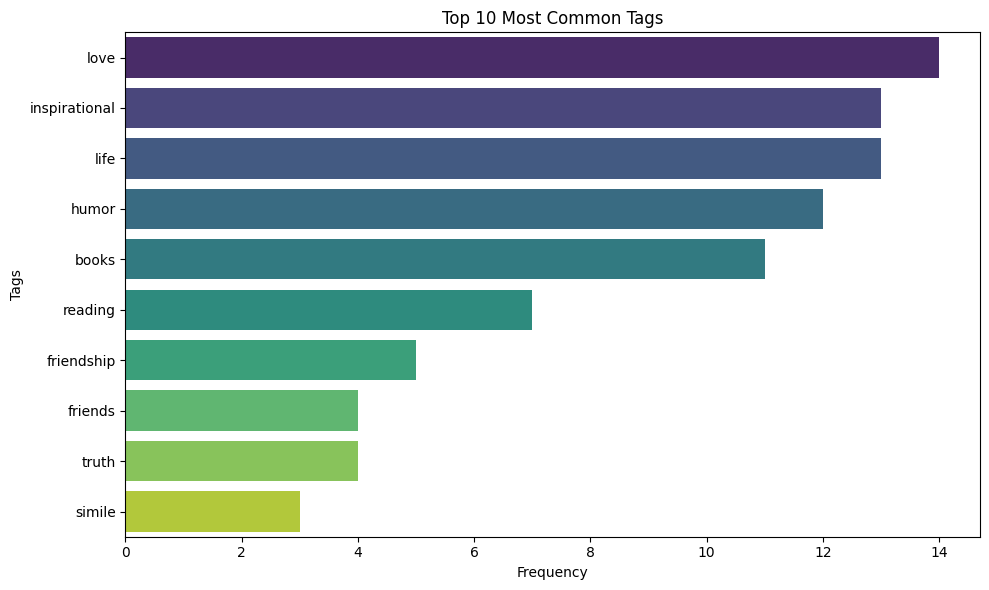

In [5]:
from collections import Counter

# Drop missing tags
tag_data = df['Tags'].dropna()

# Flatten all tags into a single list
all_tags = []
for tag_str in tag_data:
    all_tags.extend(tag_str.split(', '))

# Count tag frequency
tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(10)

# Unpack for plotting
tags, counts = zip(*top_tags)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(tags), palette='viridis')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()


In [6]:
!pip install wordcloud


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


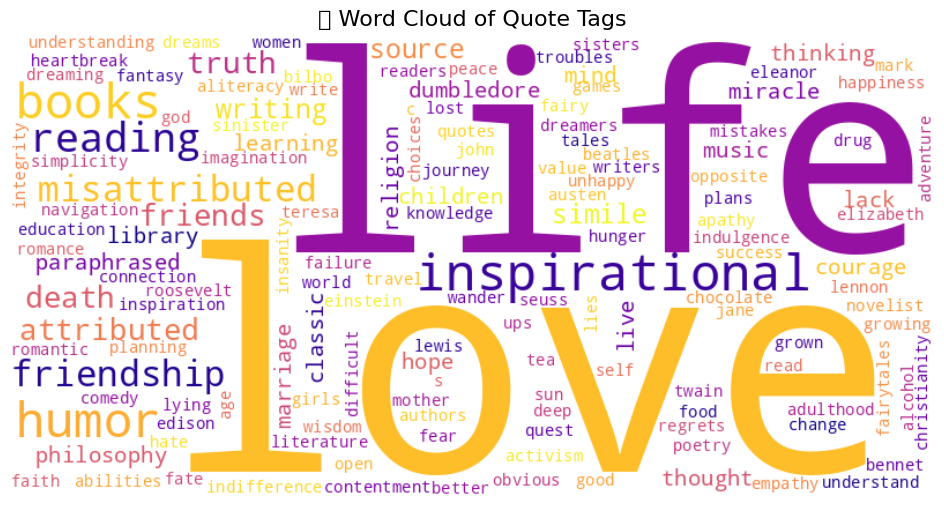

In [7]:
from wordcloud import WordCloud

# Drop missing tags
tag_data = df['Tags'].dropna()

# Combine all tags into one big string
all_tags = []
for tag_str in tag_data:
    all_tags.extend(tag_str.split(', '))

# Convert list to single string
tag_text = ' '.join(all_tags)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(tag_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🌟 Word Cloud of Quote Tags', fontsize=16)
plt.show()


In [8]:
df['Quote_Length'] = df['Quote'].apply(len)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


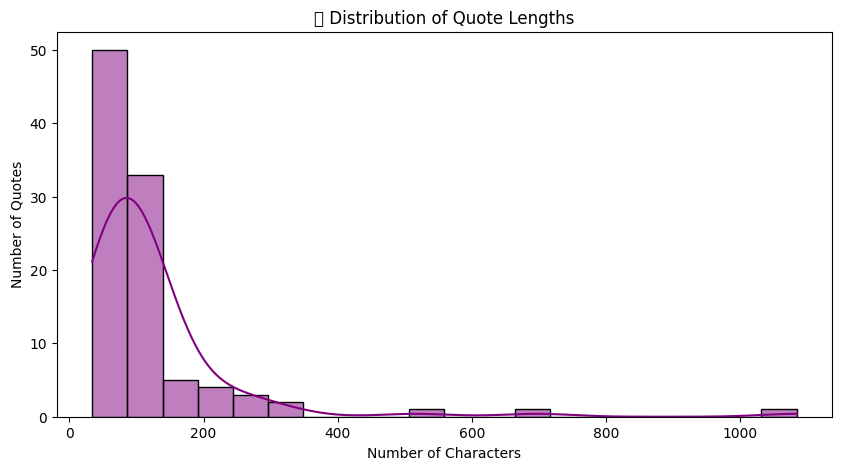

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Quote_Length'], bins=20, kde=True, color='purple')
plt.title('📝 Distribution of Quote Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Quotes')
plt.show()


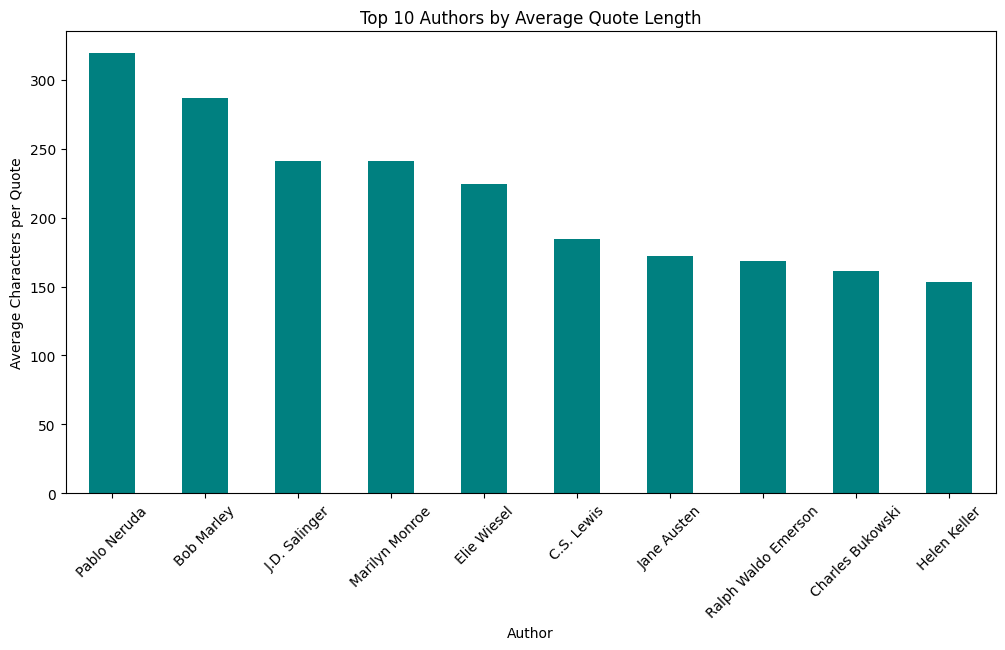

In [10]:
avg_length_by_author = df.groupby('Author')['Quote_Length'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
avg_length_by_author.plot(kind='bar', color='teal')
plt.title('Top 10 Authors by Average Quote Length')
plt.ylabel('Average Characters per Quote')
plt.xlabel('Author')
plt.xticks(rotation=45)
plt.show()


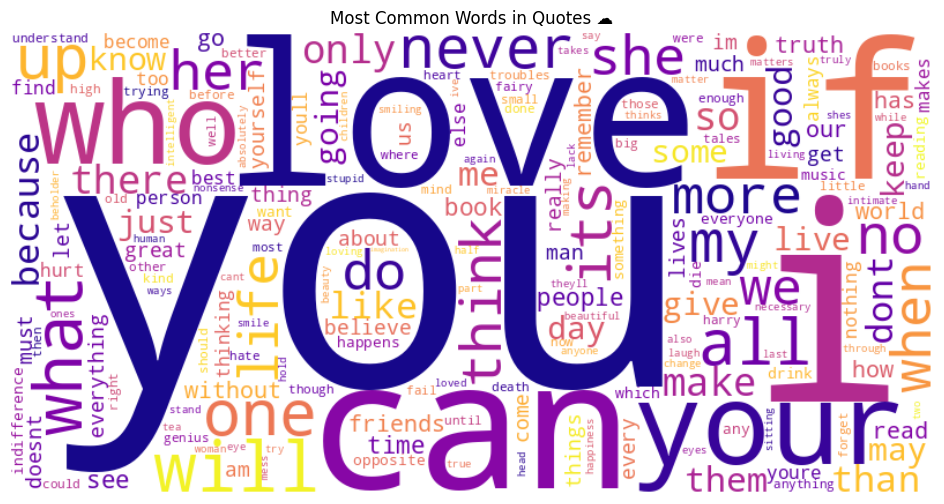

<ipython-input-12-d3225c373c5f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


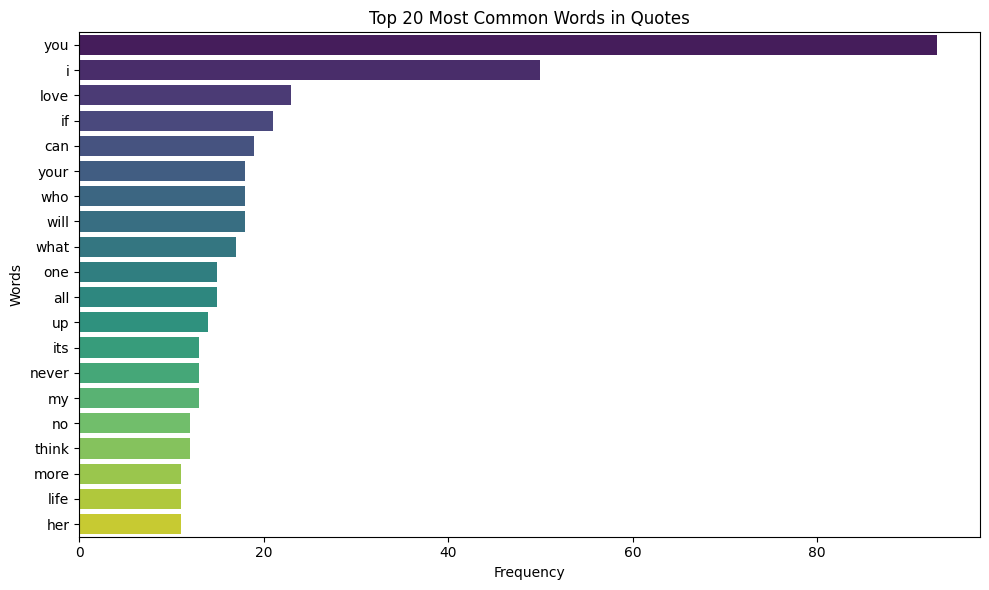

In [12]:
from collections import Counter
import re

# Combine all quotes into one string
all_text = ' '.join(df['Quote'].dropna()).lower()

# Remove punctuation and numbers
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text)

# Tokenize words
words = all_text.split()

# Optional: remove stopwords
stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'is', 'in', 'it', 'that', 'as', 'with', 'for', 'was',
    'on', 'be', 'are', 'this', 'but', 'by', 'not', 'or', 'have', 'from', 'at', 'an'
])
filtered_words = [word for word in words if word not in stopwords]

# Word counts
word_counts = Counter(filtered_words)

# ---- Word Cloud ----
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Quotes ☁️')
plt.show()

# ---- Bar Chart of Top 20 Words ----
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Quotes')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()
